<a href="https://colab.research.google.com/github/SebastianEcheverryL/Machine-Learning-InceptionV3-with-Tensorflow/blob/main/Taller3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TALLER 3

In [ ]:
!pip install numpy scipy matplotlib pydub
!pip install wfdb
!pip install PyWavelets

import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import dct, idct
import scipy as scp
import pywt
from PIL import Image
from google.colab.patches import cv2_imshow
from scipy.signal import spectrogram

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.1 MB/s eta 0:00:00


PUNTO 1

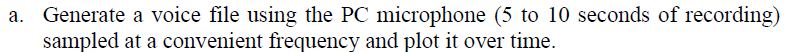


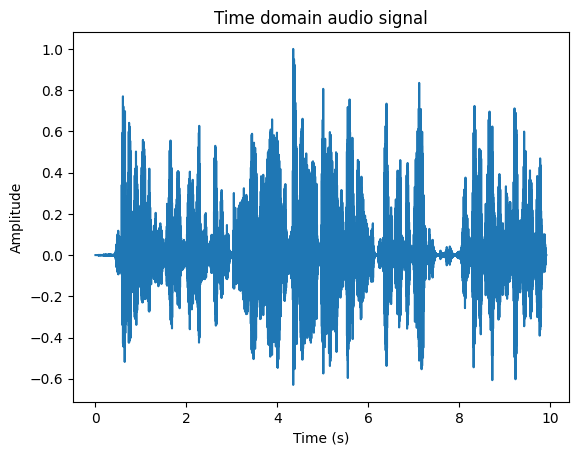

In [ ]:
# Function to upload and run the audio file
def upload_file_noisy(file_path):

    #Read the audi file
    sample_rate_orig, data_orig = wavfile.read(file_path)

    # If the file was recorded in stero format, this line converts it to mono audio.
    if len(data_orig.shape) == 2:
      data_orig = data_orig[:, 0]

    # Time
    time = np.linspace(0, (len(data_orig)/sample_rate_orig), int(sample_rate_orig * (len(data_orig)/sample_rate_orig)), endpoint=False)

    #Sinusoidal signal
    A = 0.1*np.max(np.abs(data_orig))
    phase=  0
    frequency = 200
    signal_sin_noise = data_orig + (A*np.sin(2 * np.pi * frequency * time + phase))

    #Gaussian white noise
    signal_rand_noise = data_orig + (A*np.random.normal(0.0, 0.20, data_orig.shape[0]))

    return time, data_orig, signal_sin_noise, signal_rand_noise

time, data_orig, signal_sin_noise, signal_rand_noise = upload_file_noisy("AudioLab3.wav")

# Plot the audio signal
#plt.figure(figsize=(12, 6))
plt.plot(time, data_orig/np.max(np.abs(data_orig)))
plt.title("Time domain audio signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

PUNTO 2

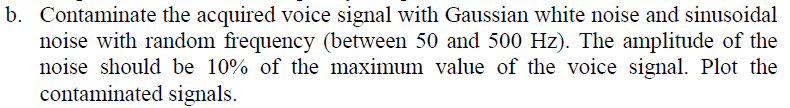

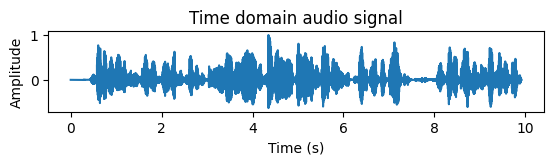

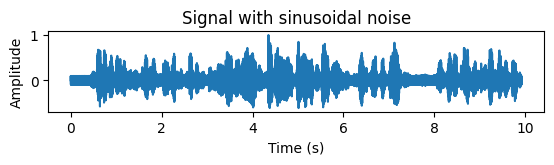

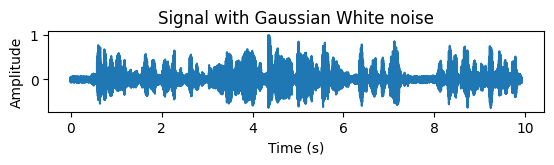

In [ ]:
time, data_orig, signal_sin_noise, signal_rand_noise = upload_file_noisy("AudioLab3.wav")

plt.subplot(4, 1, 4)
plt.plot(time, data_orig/np.max(np.abs(data_orig)))
plt.title("Time domain audio signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

#plt.figure(figsize=(8, 5))
plt.subplot(4, 1, 2)
plt.plot(time, signal_sin_noise/np.max(np.abs(signal_sin_noise)))
plt.title("Signal with sinusoidal noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

#plt.figure(figsize=(8, 5))
plt.subplot(4, 1, 4)
plt.plot(time, signal_rand_noise/np.max(np.abs(signal_rand_noise)))
plt.title("Signal with Gaussian White noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

PUNTO 3

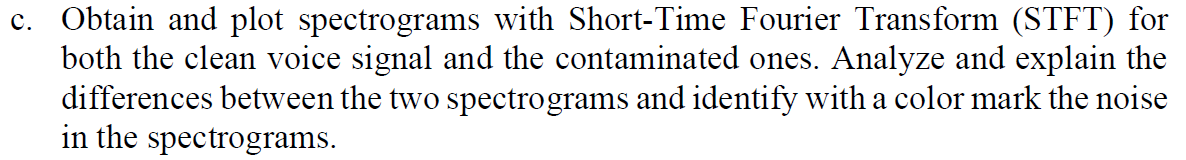

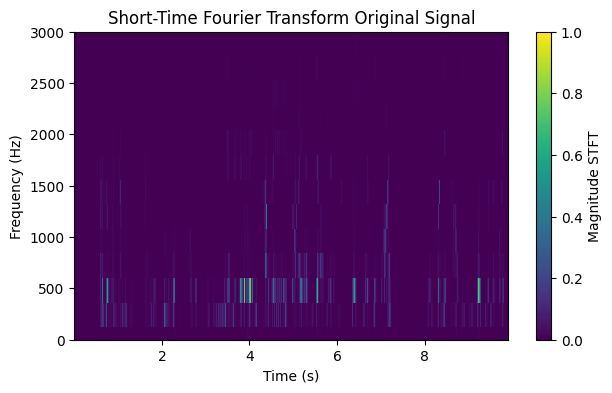

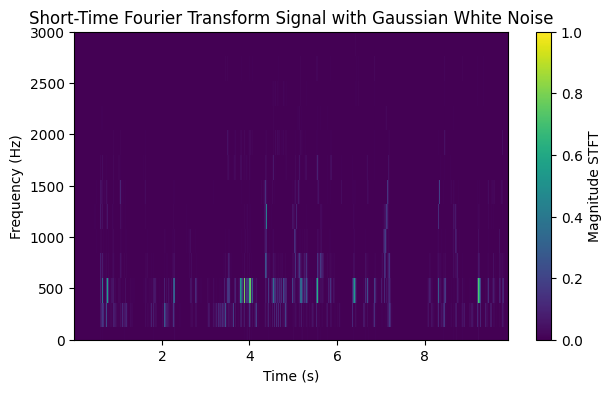

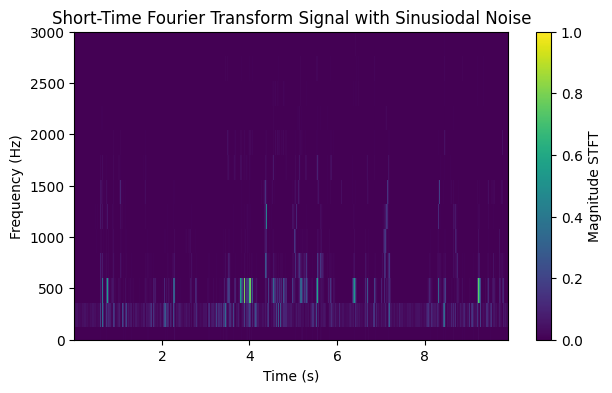

In [ ]:
time, data_orig, signal_sin_noise, signal_rand_noise = upload_file_noisy("AudioLab3.wav")

# Generate a sample signal
fs = 48000 # Sampling frequency (Hz)
nwindow=200;noverlap=np.ceil(0.001*nwindow)

# Compute the Short-Time Fourier Transform (STFT) for Original Signal
frequencies_orig, times_orig, Sxx_orig = spectrogram(data_orig, fs=fs, nperseg=nwindow, noverlap=noverlap)

# Compute the Short-Time Fourier Transform (STFT) for Gaussian White noise
frequencies_rand, times_rand, Sxx_rand = spectrogram(signal_rand_noise, fs=fs, nperseg=nwindow, noverlap=noverlap)

# Compute the Short-Time Fourier Transform (STFT) for Sinusoidal Noise
frequencies_sin, times_sin, Sxx_sin = spectrogram(signal_sin_noise, fs=fs, nperseg=nwindow, noverlap=noverlap)

# Plot the STFT
plt.figure(figsize=(7, 4))
plt.pcolormesh(times_orig, frequencies_orig, Sxx_orig/np.max(Sxx_orig))
plt.colorbar(label='Magnitude STFT')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Short-Time Fourier Transform Original Signal')
plt.ylim(0, 3000)  # Limit the frequency range for better visualization
plt.show()

# Plot the STFT Random Noise
plt.figure(figsize=(7, 4))
plt.pcolormesh(times_rand, frequencies_rand, Sxx_rand/np.max(Sxx_rand))
plt.colorbar(label='Magnitude STFT')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Short-Time Fourier Transform Signal with Gaussian White Noise')
plt.ylim(0, 3000)  # Limit the frequency range for better visualization
plt.show()

# Plot the STFT Sinusoidal Noise
plt.figure(figsize=(7, 4))
plt.pcolormesh(times_sin, frequencies_sin, Sxx_sin/np.max(Sxx_sin))
plt.colorbar(label='Magnitude STFT')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Short-Time Fourier Transform Signal with Sinusiodal Noise')
plt.ylim(0, 3000)  # Limit the frequency range for better visualization
plt.show()

PUNTO 4

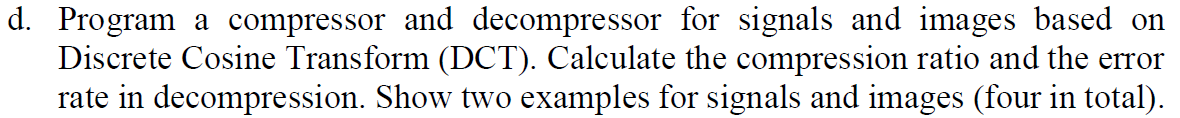

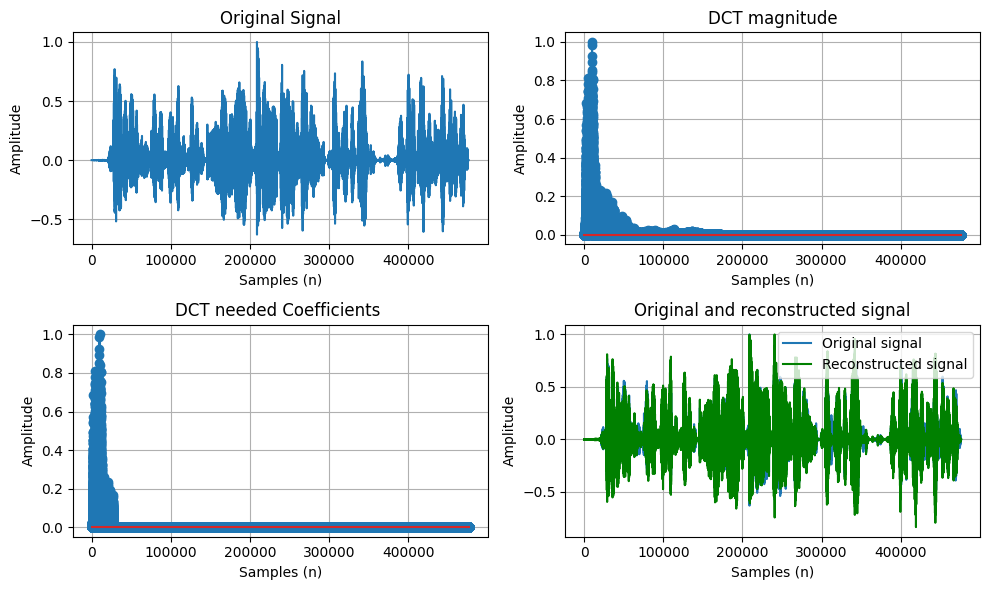

Compression Ratio: 1.0
Compression ratio between the original size and the samples with information: 17.81036095006546
Error rate in decompression: 1.1645120300008016e-14


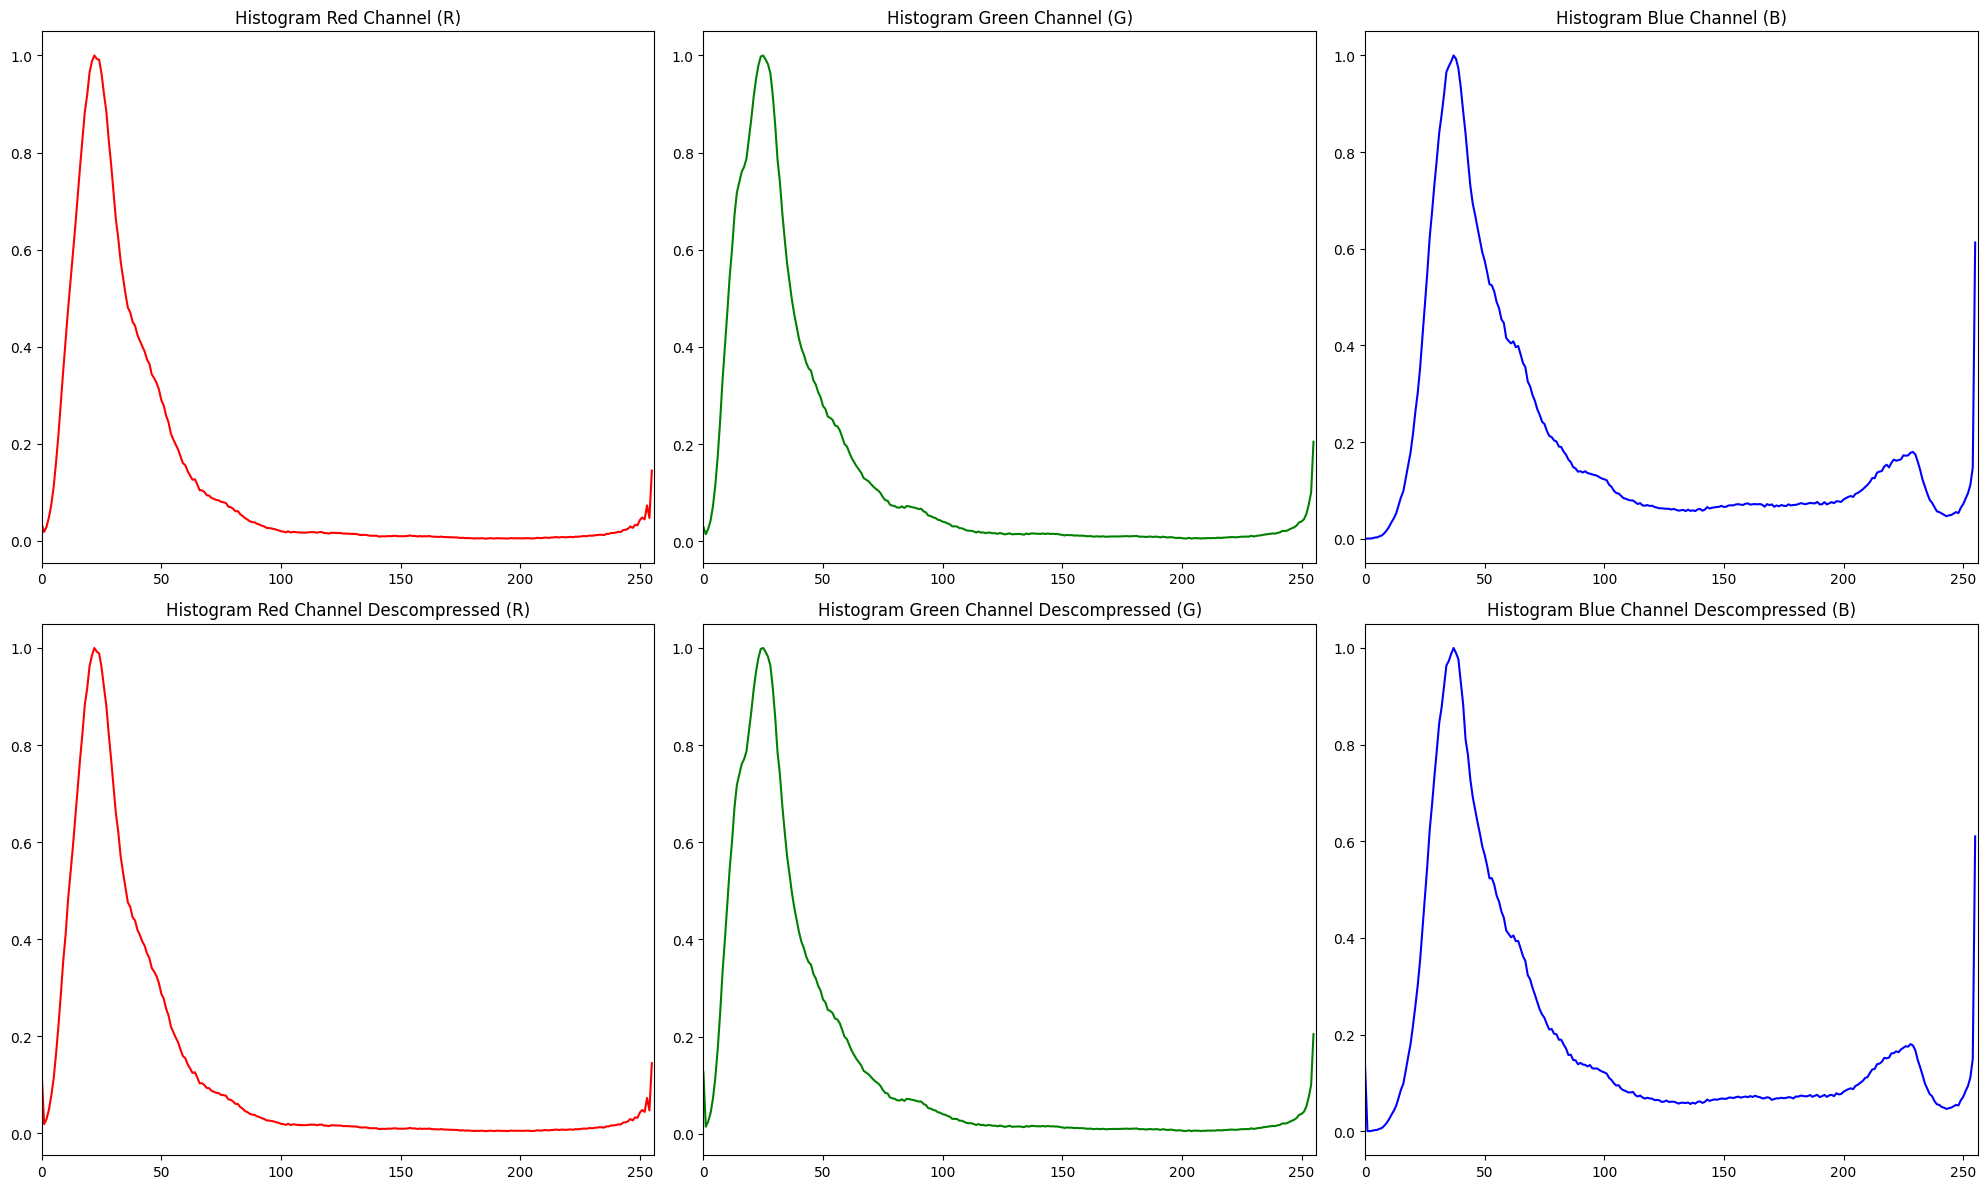

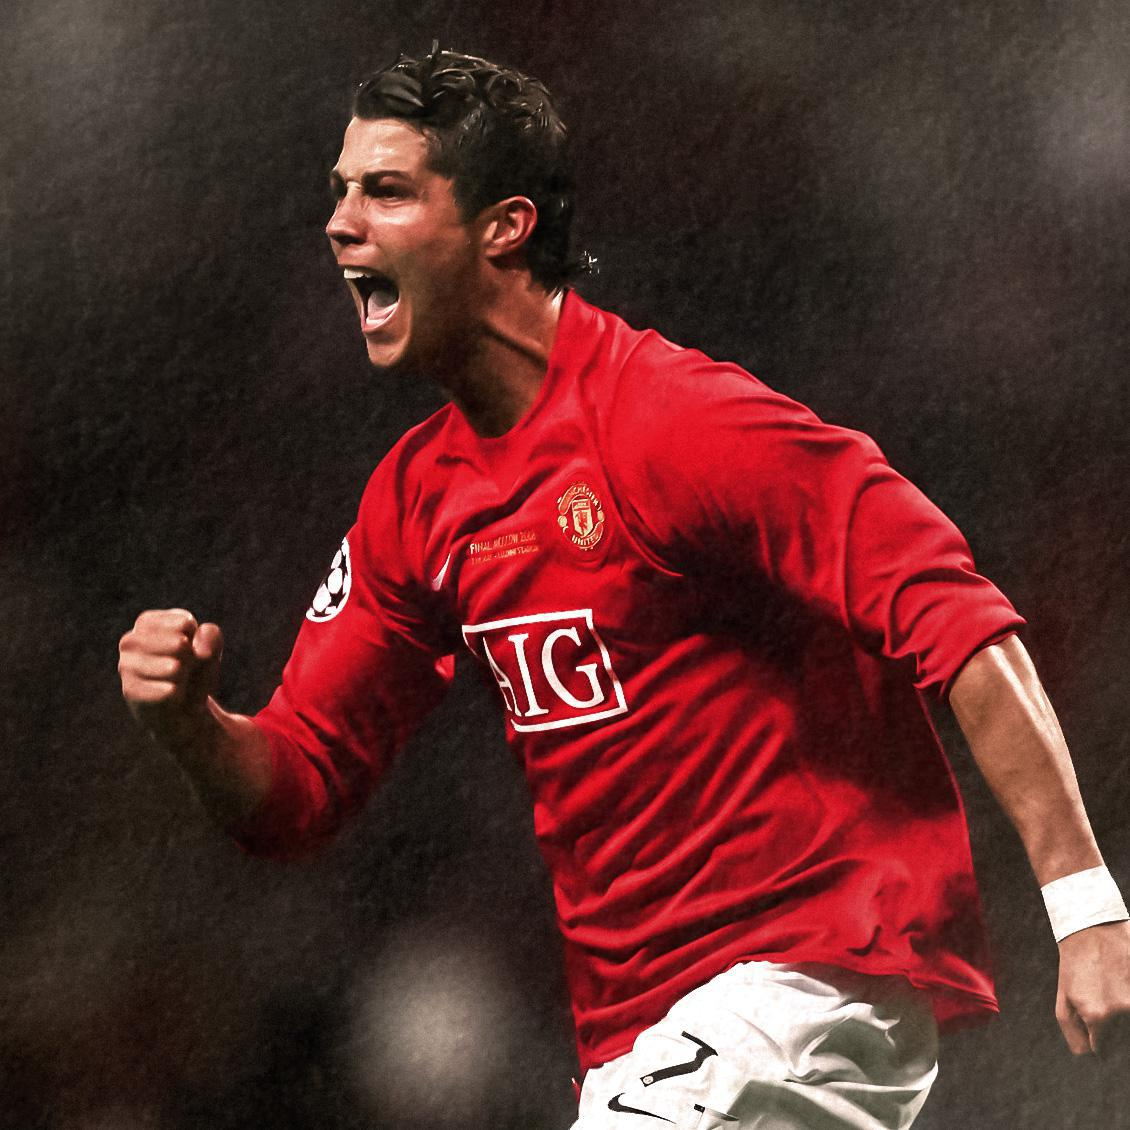

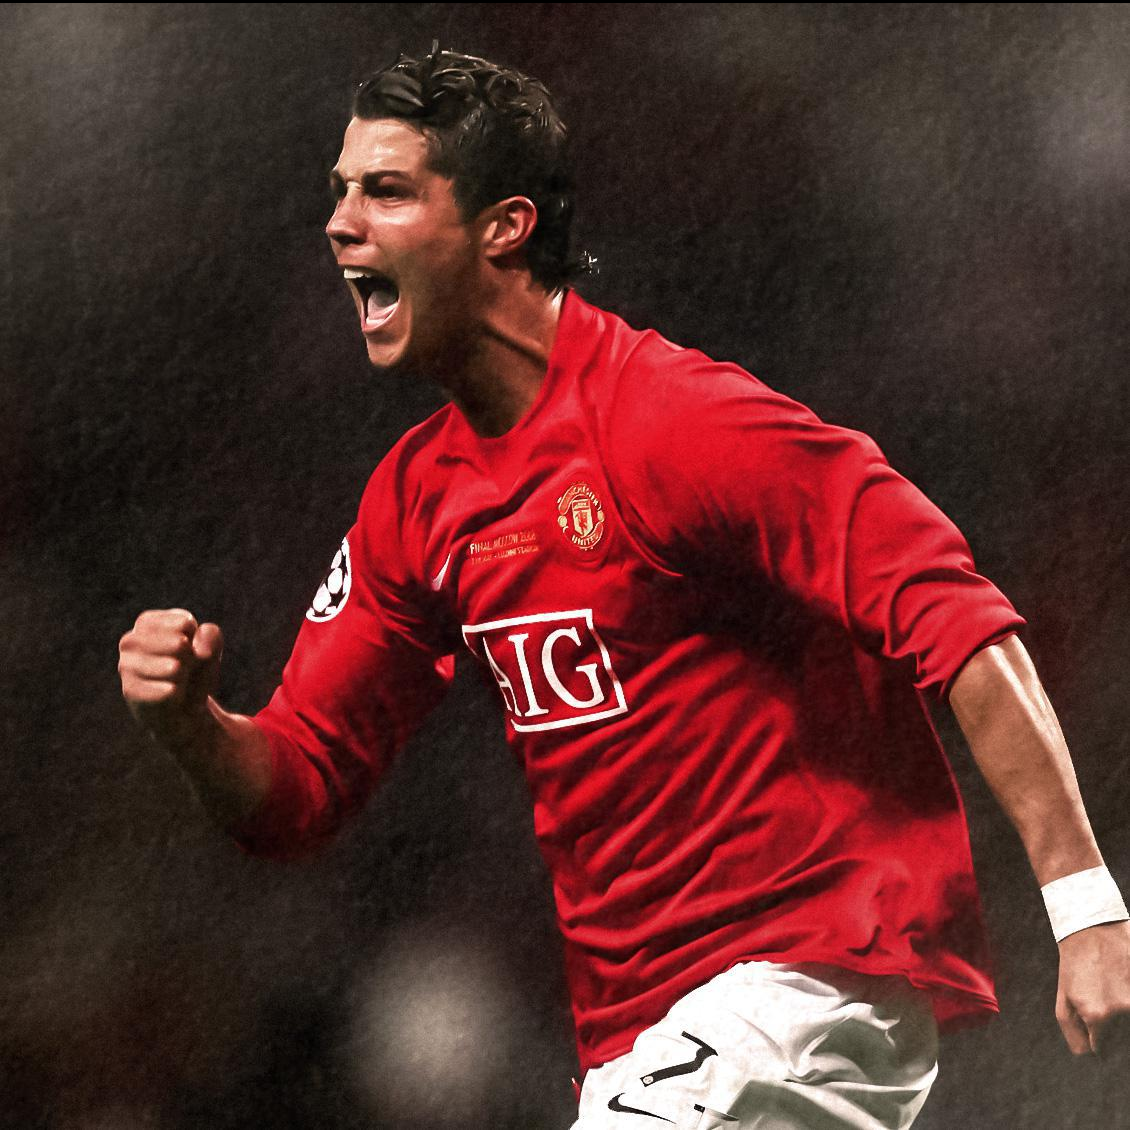

Compression Ratio: 1.0
Compression ratio between the original size and the samples with information: 3830700.0
Peak Signal-to-Noise Ratio (PSNR): 52.661714538651445


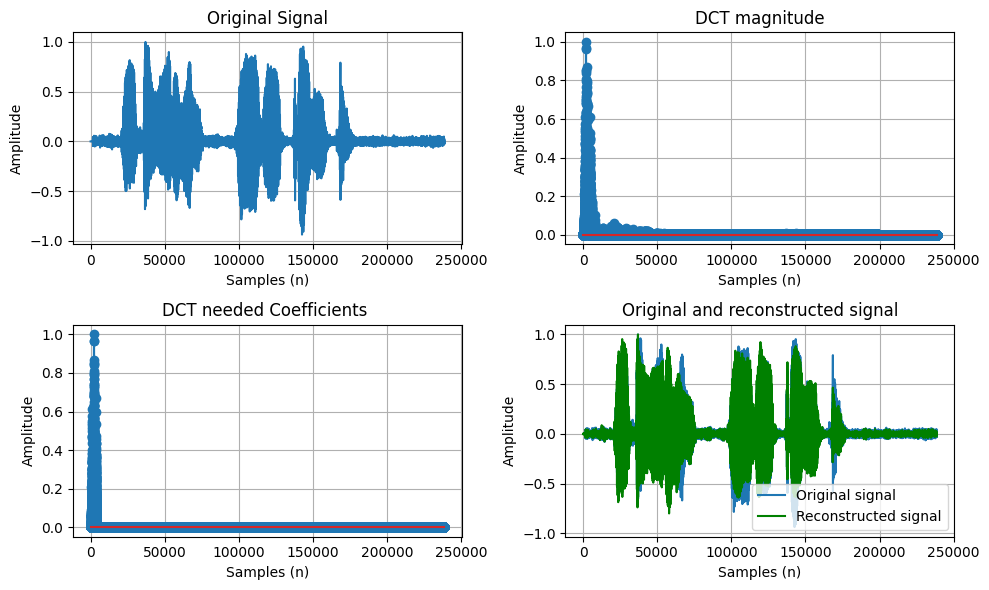

Compression Ratio: 1.0
Compression ratio between the original size and the samples with information: 61.28743899306448
Error rate in decompression: 3.8293265758173496e-14


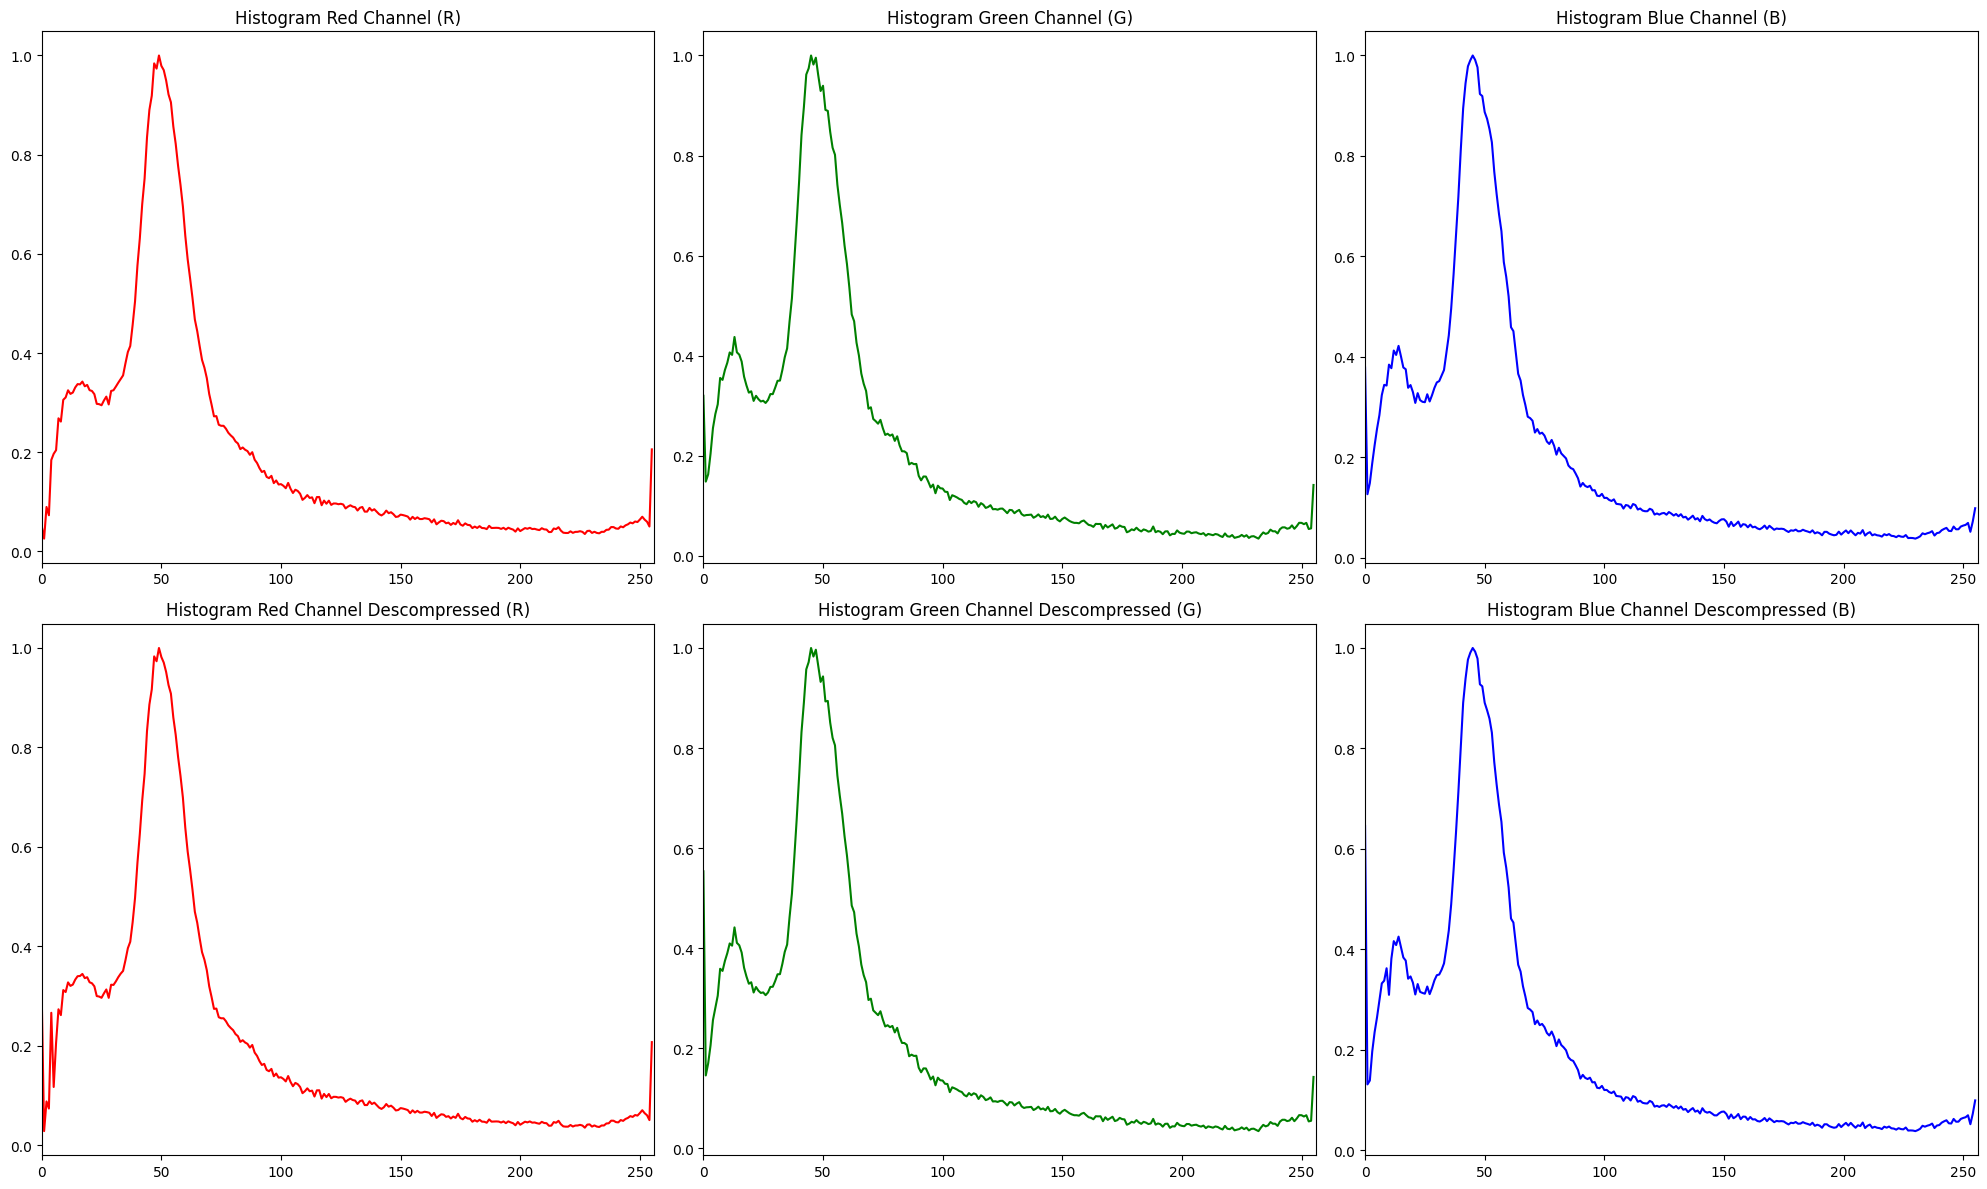

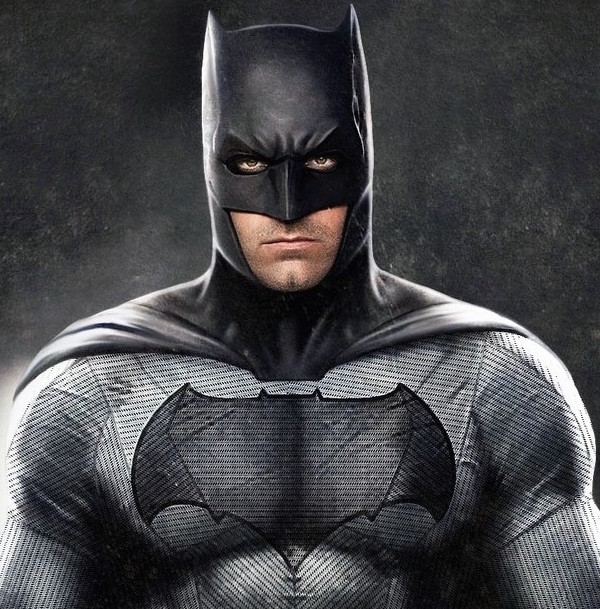

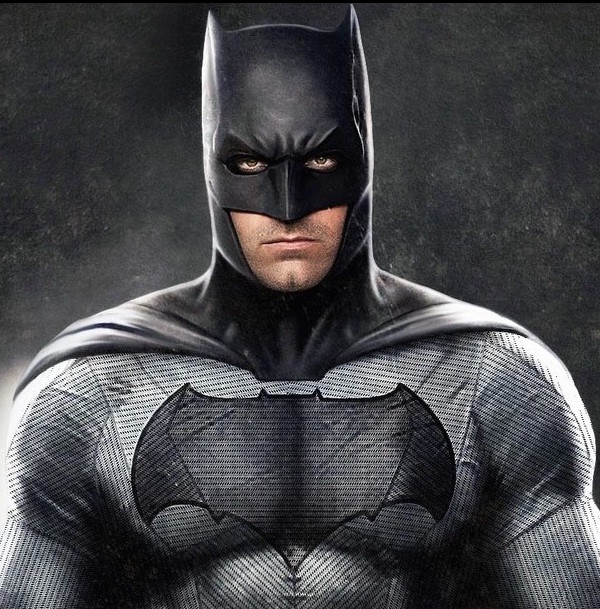

Compression Ratio: 1.0
Compression ratio between the original size and the samples with information: 548100.0
Peak Signal-to-Noise Ratio (PSNR): 50.177991491317364


In [ ]:
def dct_function_audio(file_path):

    #Read the audi file
    sample_rate_orig, data_orig = wavfile.read(file_path)

    # If the file was recorded in stero format, this line converts it to mono audio.
    if len(data_orig.shape) == 2:
      data_orig = data_orig[:, 0]

    # Time
    time = np.linspace(0, (len(data_orig)/sample_rate_orig), int(sample_rate_orig * (len(data_orig)/sample_rate_orig)), endpoint=False)

    # Plot the original signal
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, 1)
    plt.grid(True)
    plt.plot(data_orig/np.max(data_orig))
    plt.title("Original Signal")
    plt.xlabel("Samples (n)")
    plt.ylabel("Amplitude")

    # Calculate the DCT:
    dct_result = dct(data_orig, type=2)/(2*len(data_orig))

    plt.subplot(2, 2, 2)
    plt.grid(True)
    plt.stem(np.abs(dct_result)/np.max(np.abs(dct_result)))
    plt.title("DCT magnitude")
    plt.xlabel("Samples (n)")
    plt.ylabel("Amplitude")


    # We sort the coefficients of the DCT:
    ind = np.argsort(np.abs(dct_result))[::-1]

    i = 1
    # We obtain the 99% of the signal energy:
    while np.linalg.norm(dct_result[ind[:i]]) / np.linalg.norm(dct_result) < 0.99:
        i += 1

    Needed = i
    dct_result[Needed:] = 0

    plt.subplot(2, 2, 3)
    plt.grid(True)
    plt.stem(np.abs(dct_result)/np.max(np.abs(dct_result)))
    plt.title("DCT needed Coefficients ")
    plt.xlabel("Samples (n)")
    plt.ylabel("Amplitude")


    R_signal=idct(dct_result,type=2)

    plt.subplot(2, 2, 4)
    plt.grid(True)
    plt.plot(data_orig/np.max(data_orig),label='Original signal')
    plt.xlabel('Samples (n)')
    plt.ylabel('Amplitude')
    plt.plot(R_signal/np.max(np.abs(R_signal)),label='Reconstructed signal',color='green')
    plt.xlabel('Samples (n)')
    plt.ylabel('Amplitude')
    plt.title('Original and reconstructed signal')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Calculate the compression ratio
    compression_ratio = len(data_orig)/len(dct_result)
    print("Compression Ratio:", compression_ratio)

    compression_ratio_Needed = len(data_orig)/i
    print("Compression ratio between the original size and the samples with information:", compression_ratio_Needed)

    # Calculate the error rate in decompression
    error = abs(np.mean(data_orig) - np.mean(R_signal))/np.mean(data_orig)
    print("Error rate in decompression:", error)


def dct_function_imagen(imagen_path):

    # Upload the imagen
    image = cv2.imread(imagen_path)

    # Convert the imagen to a PyArray
    imagen_np = np.array(image)

    # Split the imagen in 3 channels R,G,B
    canal_r = imagen_np[:, :, 0]
    canal_g = imagen_np[:, :, 1]
    canal_b = imagen_np[:, :, 2]

    # Create a histogram for each channel
    hist_r, bins_r = np.histogram(canal_r.flatten(), bins=256, range=[0,256])
    hist_g, bins_g = np.histogram(canal_g.flatten(), bins=256, range=[0,256])
    hist_b, bins_b = np.histogram(canal_b.flatten(), bins=256, range=[0,256])

    # Calculate the DCT for image
    dct_image = dct(image, type = 2)

    # Sort the coefficients of the DCT blue scale
    ind = np.argsort(np.abs(dct_image))[::-1]

    i = 1
    # Obtain the 99.9999% of image
    while np.linalg.norm(dct_image[ind[:i]])/np.linalg.norm(dct_image) < 0.999999999:
        i += 1

    Needed = i
    dct_image[ind[Needed:]] = 0

    R_image = idct(dct_image, type = 2)/6

    # Split the imagen in 3 channels R,G,B
    canal_rd = R_image[:, :, 0]
    canal_gd = R_image[:, :, 1]
    canal_bd = R_image[:, :, 2]

    # Create a histogram for each channel
    hist_rd, bins_rd = np.histogram(canal_rd.flatten(), bins=256, range=[0,256])
    hist_gd, bins_gd = np.histogram(canal_gd.flatten(), bins=256, range=[0,256])
    hist_bd, bins_bd = np.histogram(canal_bd.flatten(), bins=256, range=[0,256])

    plt.figure(figsize=(20, 12))
    # Original Red Histogram
    plt.subplot(2, 3, 1)
    plt.plot(hist_r/np.max(hist_r), color='red')
    plt.title('Histogram Red Channel (R)')
    plt.xlim([0, 256])

    # Original Green Histogram
    plt.subplot(2, 3, 2)
    plt.plot(hist_g/np.max(hist_g), color='green')
    plt.title('Histogram Green Channel (G)')
    plt.xlim([0, 256])

    # Original Blue Histogram
    plt.subplot(2, 3, 3)
    plt.plot(hist_b/np.max(hist_b), color='blue')
    plt.title('Histogram Blue Channel (B)')
    plt.xlim([0, 256])

    # Decompressed Red Histogram
    plt.subplot(2, 3, 4)
    plt.plot(hist_rd/np.max(hist_rd), color='red')
    plt.title('Histogram Red Channel Descompressed (R)')
    plt.xlim([0, 256])

    # Decompressed Green Histogram
    plt.subplot(2, 3, 5)
    plt.plot(hist_gd/np.max(hist_gd), color='green')
    plt.title('Histogram Green Channel Descompressed (G)')
    plt.xlim([0, 256])

    # Decompressed Blue Histogram
    plt.subplot(2, 3, 6)
    plt.plot(hist_bd/np.max(hist_bd), color='blue')
    plt.title('Histogram Blue Channel Descompressed (B)')
    plt.xlim([0, 256])

    # Show the histogrm
    plt.tight_layout()
    plt.show()

    # Original Imagen
    cv2_imshow(image)

    # Decompressed Imagen)
    cv2_imshow(R_image)

    # Calculate the size of the original and compressed images
    size = image.shape[0]*image.shape[1]*image.shape[2]
    R_size = R_image.shape[0]*R_image.shape[1]*R_image.shape[2]

    # Calculate the compression ratio
    compression_ratio = size/R_size
    print("Compression Ratio:", compression_ratio)

    compression_with_Needed = size/i
    print("Compression ratio between the original size and the samples with information:", compression_with_Needed)

    # Calculate the difference between the original and decompressed images
    D_image = cv2.absdiff(image.astype(np.uint8), R_image.astype(np.uint8))

    # Calculate the Mean Squared Error (MSE)
    mse = np.mean(D_image.astype(np.uint8)**2)

    # Calculate the Peak Signal-to-Noise Ratio (PSNR)
    max_pixel_value = 255   # Maximum pixel value for an 8-bit image
    psnr = 10*np.log10((max_pixel_value**2)/mse)
    print("Peak Signal-to-Noise Ratio (PSNR):", psnr)


dct_function_audio("AudioLab3.wav")

dct_function_imagen("ImgLab3.jpg")

dct_function_audio("AudioLab3_2.wav")

dct_function_imagen("ImgLab3_2.jpg")



PUNTO 5

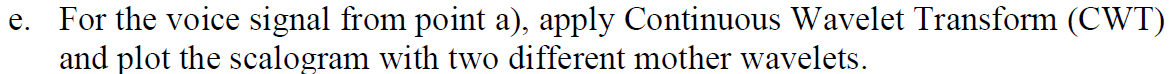

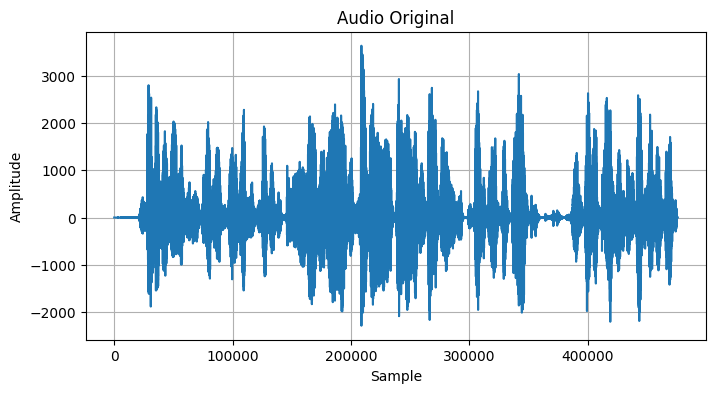

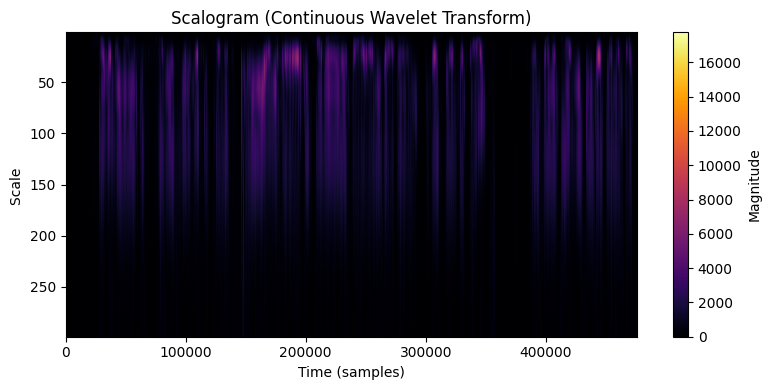

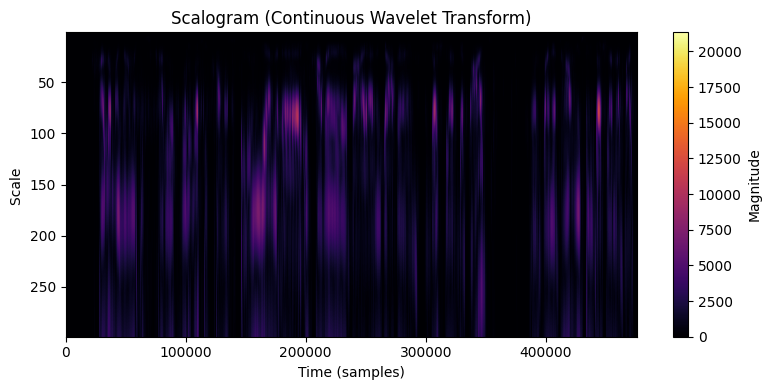

In [ ]:
#Read the audi file
sample_rate_orig, data_orig = wavfile.read("AudioLab3.wav")

# If the file was recorded in stero format, this line converts it to mono audio.
if len(data_orig.shape) == 2:
  data_orig = data_orig[:, 0]

# Time
time = np.linspace(0, (len(data_orig)/sample_rate_orig), int(sample_rate_orig * (len(data_orig)/sample_rate_orig)), endpoint=False)

plt.figure(figsize=(8, 4))
plt.grid(True)
plt.plot(data_orig)
plt.title("Audio Original")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

scales = np.arange(1, 300)  # Range of scales (or inverse frequencies)

# Compute the Continuous Wavelet Transform (CWT) with Mexican Wavelet
wavelet1='mexh'
coeffs1, freqs1 = pywt.cwt(data_orig, scales, wavelet1)

# Plot the scalogram with mexican wavelet
plt.figure(figsize=(8, 4))
plt.imshow(np.abs(coeffs1), extent=[0, len(data_orig), max(scales), min(scales)],
          aspect='auto', cmap='inferno')
plt.colorbar(label='Magnitude')
plt.xlabel('Time (samples)')
plt.ylabel('Scale ')
plt.title('Scalogram (Continuous Wavelet Transform)')
plt.tight_layout()
plt.show()

# Compute the Continuous Wavelet Transform (CWT) with Mexican Wavelet
wavelet2='morl'
coeffs2, freqs2 = pywt.cwt(data_orig, scales, wavelet2)

# Plot the scalogram with mexican wavelet
plt.figure(figsize=(8, 4))
plt.imshow(np.abs(coeffs2), extent=[0, len(data_orig), max(scales), min(scales)],
          aspect='auto', cmap='inferno')
plt.colorbar(label='Magnitude')
plt.xlabel('Time (samples)')
plt.ylabel('Scale ')
plt.title('Scalogram (Continuous Wavelet Transform)')
plt.tight_layout()
plt.show()


PUNTO 6

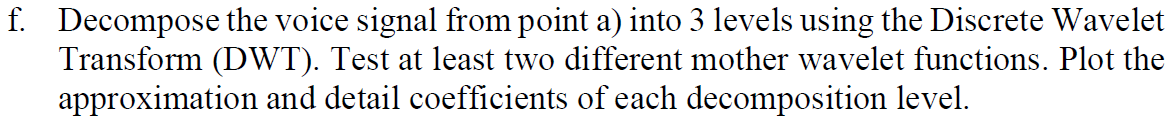

db3


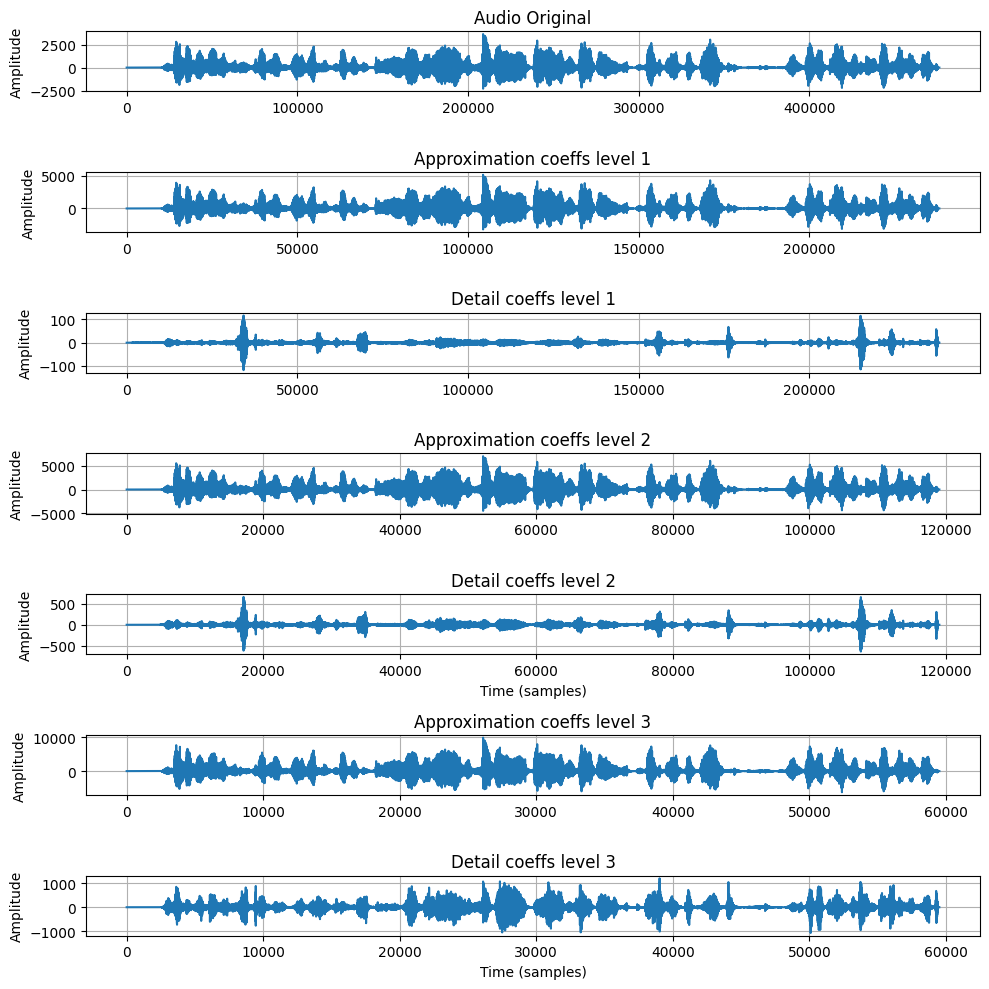

sym4


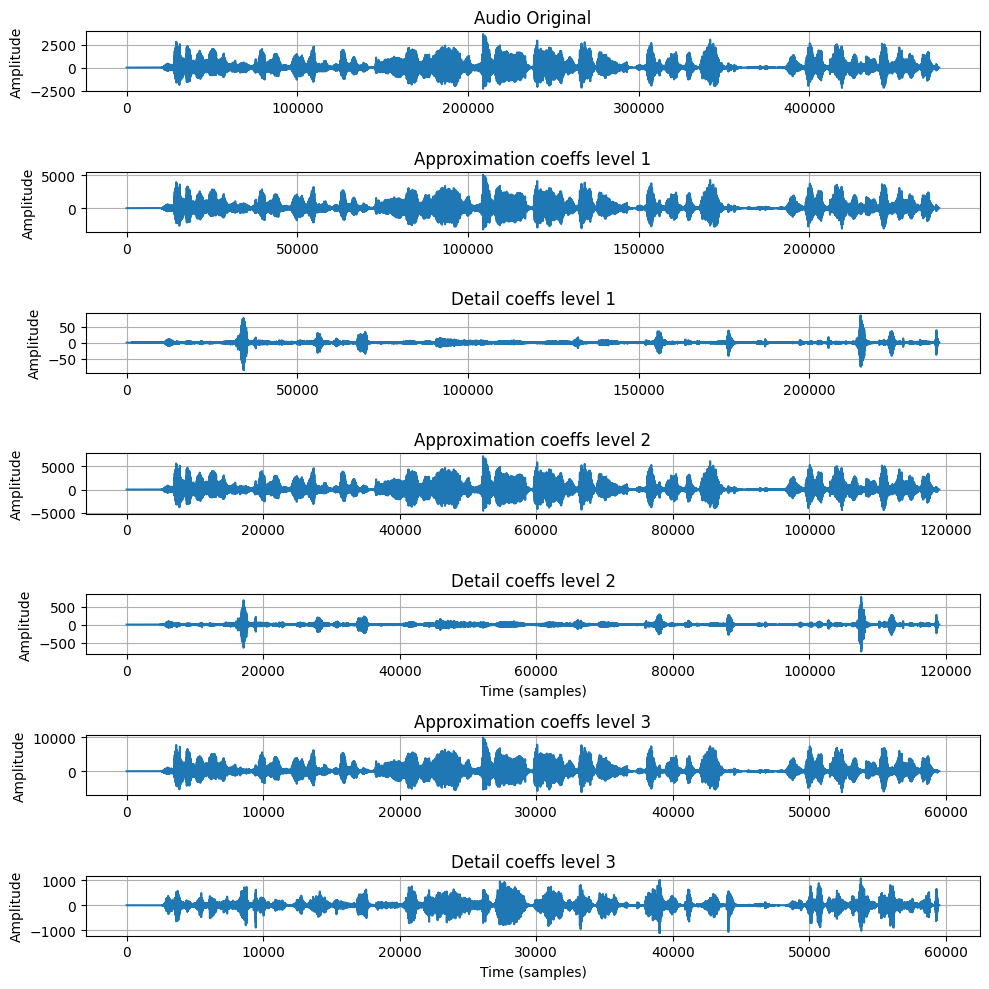

In [ ]:
def dwt_function(audio_path, wavelet):
  #Read the audi file
  sample_rate_orig, data_orig = wavfile.read(audio_path)

  # If the file was recorded in stero format, this line converts it to mono audio.
  if len(data_orig.shape) == 2:
    data_orig = data_orig[:, 0]

  # Time
  time = np.linspace(0, (len(data_orig)/sample_rate_orig), int(sample_rate_orig * (len(data_orig)/sample_rate_orig)), endpoint=False)

  #Dircrete Wavelet Transform
  # Perform the DWT (1st level)
  coeffs = pywt.dwt(data_orig, wavelet)
  # Extract the approximation and detail coefficients (1st level)
  approximation1, detail1 = coeffs

  # Perform the DWT (2nd level)
  coeffs2 = pywt.dwt(approximation1, wavelet)
  # Extract the approximation and detail coefficients (2nd level)
  approximation2, detail2 = coeffs2


  # Perform the DWT (3rd level)
  coeffs3 = pywt.dwt(approximation2, wavelet)
  # Extract the approximation and detail coefficients (3rd level)
  approximation3, detail3 = coeffs3

  print(wavelet)

  plt.figure(figsize=(10, 10))
  plt.subplot(7,1,1)
  plt.grid(True)
  plt.plot(data_orig)
  plt.title("Audio Original")
  #plt.xlabel("Time (samples)")
  plt.ylabel("Amplitude")

  plt.subplot(7,1,2)
  plt.grid(True)
  plt.plot(approximation1)
  plt.title("Approximation coeffs level 1")
  #plt.xlabel("Time (samples)")
  plt.ylabel("Amplitude")

  plt.subplot(7,1,3)
  plt.grid(True)
  plt.plot(detail1)
  plt.title("Detail coeffs level 1")
  #plt.xlabel("Time (samples)")
  plt.ylabel("Amplitude")

  plt.subplot(7,1,4)
  plt.grid(True)
  plt.plot(approximation2)
  plt.title("Approximation coeffs level 2")
  #plt.xlabel("Time (samples)")
  plt.ylabel("Amplitude")

  plt.subplot(7,1,5)
  plt.grid(True)
  plt.plot(detail2)
  plt.title("Detail coeffs level 2")
  plt.xlabel("Time (samples)")
  plt.ylabel("Amplitude")

  plt.subplot(7,1,6)
  plt.grid(True)
  plt.plot(approximation3)
  plt.title("Approximation coeffs level 3")
  #plt.xlabel("Time (samples)")
  plt.ylabel("Amplitude")

  plt.subplot(7,1,7)
  plt.grid(True)
  plt.plot(detail3)
  plt.title("Detail coeffs level 3")
  plt.xlabel("Time (samples)")
  plt.ylabel("Amplitude")
  plt.tight_layout()
  plt.show()

dwt_function("AudioLab3.wav", "db3")

dwt_function("AudioLab3.wav", "sym4")

PUNTO 7

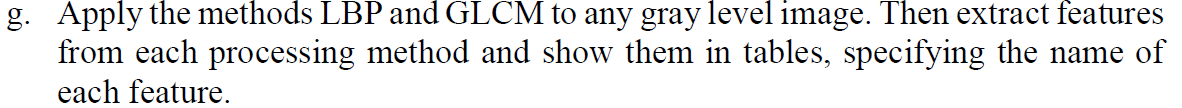

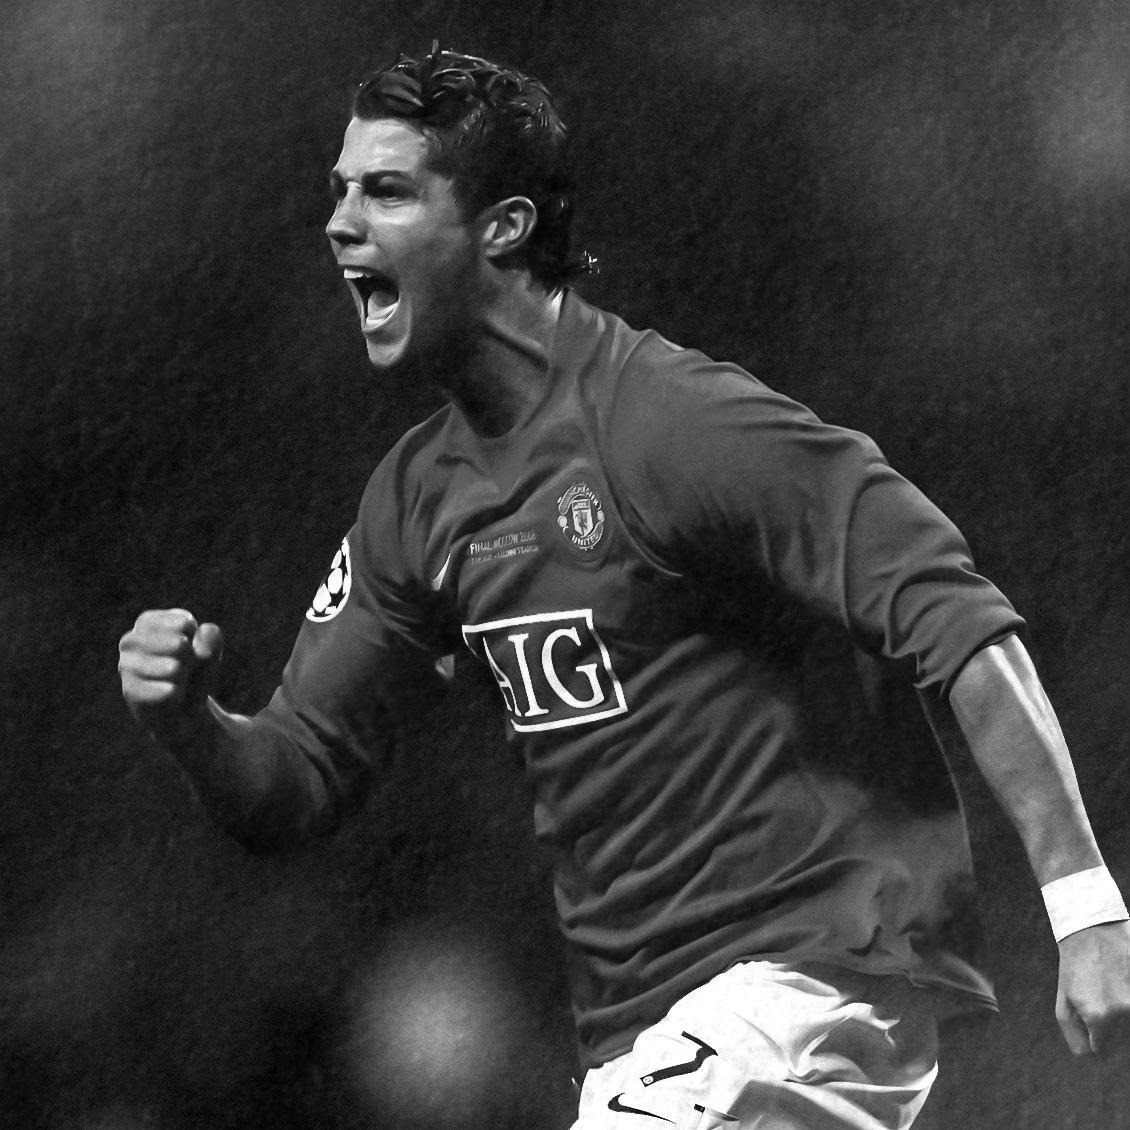

Contraste GLCM:  [[ 69.36216951 118.87926247  69.17271687 116.64981983]
 [171.48058746 118.87926247 180.59674575 116.64981983]
 [263.15532583 270.12375195 286.41475136 267.50232005]]
Correlación GLCM:  [[0.98356208 0.97180775 0.98358914 0.97233647]
 [0.95937666 0.97180775 0.95712577 0.97233647]
 [0.93768284 0.93592129 0.93196034 0.93654324]]
Energía GLCM:  [[0.0359488  0.03007205 0.03424405 0.03074148]
 [0.02832673 0.03007205 0.02763888 0.03074148]
 [0.02611367 0.02566846 0.02593335 0.02650016]]
Homogeneidad GLCM:  [[0.34308544 0.25349544 0.31684964 0.26541469]
 [0.22877902 0.25349544 0.21770046 0.26541469]
 [0.1957718  0.18785599 0.19225015 0.20009501]]
Histograma LBP: [0.03272065 0.07224215 0.04915185 0.13247474 0.18224685 0.1679043
 0.1017331  0.07442086 0.0828765  0.10422899]


In [ ]:
# Carga la imagen:
image = cv2.imread('ImgLab3.jpg')
image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)

# 1. Matrix de co-ocurrencia a nivel de gris (GLCM):
import skimage

# Calcula la GLCM
distances = [1, 2, 3] # Distancias entre pixeles
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4] # Angulos entre pixeles
glcm = skimage.feature.graycomatrix(image_gray, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

# Calcula algunas características de textura de la GLCM:
contrast = skimage.feature.graycoprops(glcm, 'contrast')
correlation = skimage.feature.graycoprops(glcm, 'correlation')
energy = skimage.feature.graycoprops(glcm, 'energy')
homogeneity = skimage.feature.graycoprops(glcm, 'homogeneity')

print('Contraste GLCM: ',contrast)
print('Correlación GLCM: ',correlation)
print('Energía GLCM: ',energy)
print('Homogeneidad GLCM: ',homogeneity)

# 2. Local binary Patterns (LBP):

from skimage.feature import local_binary_pattern

# Calcula el descriptor LBP:
radius = 1 # radio del círculo de vecinos
n_points = 8 # número de pixeles vecinos para comparar
lbp = local_binary_pattern(image_gray, n_points, radius, method='uniform')

# Computa el descriptor del histograma del descriptor LBP:
hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
# También se pueden calcular características estadísticas: media, varianza, etc

# Normaliza el histograma:
hist = hist.astype('float') / hist.sum()
print('Histograma LBP:',hist)